In [2]:
import pandas as pd

df = pd.read_csv("../datasets/train_df.csv")

df

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0
...,...,...,...
999995,4bd96088d0b5f0f2c4f4,How is CSE at VIT Chennai?,0
999996,e80edbfc086f7125940f,"How can we prevent a holocaust by robots, AI, ...",0
999997,1506dfad6bd340782a1f,How can I help a student remember key steps an...,0
999998,b56c60fd407f2f85553c,What is the difference between lace closure & ...,0


/home/btv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


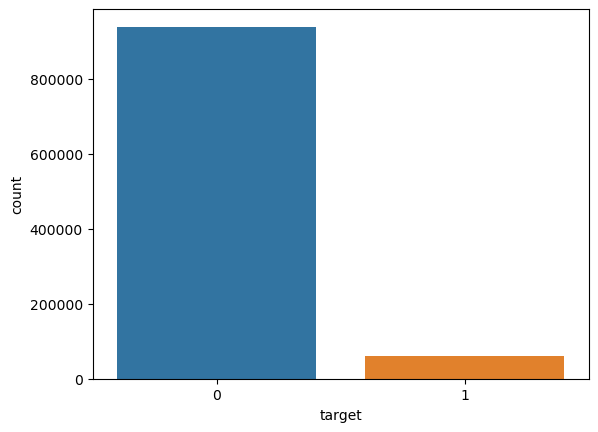

In [3]:
import seaborn as sns

sns.countplot(df["target"])

## Word Tokenizer

In [5]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def word_tokenize(sent):
    return nltk.word_tokenize(sent)

print("word tokenizing:",word_tokenize("Life is beautiful so Enjoy everymoment you have."))


word tokenizing: ['Life', 'is', 'beautiful', 'so', 'Enjoy', 'everymoment', 'you', 'have', '.']


[nltk_data] Downloading package punkt to /home/btv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## RegexpTokenizer

In [6]:
from nltk.tokenize import RegexpTokenizer


def regex_word_tokenizer(sent):
    tokenizer = RegexpTokenizer(r'\w+')

    sample_word_tokens = tokenizer.tokenize(sent)
    sample_word_tokens = [word.lower() for word in sample_word_tokens]
    return sample_word_tokens

words = regex_word_tokenizer(str("Life is beautiful so Enjoy everymoment you have. Runners run hard to win"))
words

['life',
 'is',
 'beautiful',
 'so',
 'enjoy',
 'everymoment',
 'you',
 'have',
 'runners',
 'run',
 'hard',
 'to',
 'win']

## Stopwords Removal

In [7]:
from nltk.corpus import stopwords

def stop_words_removal(words):
    stop_words = [word.lower() for word in stopwords.words('english')]
    word_tokens = [word for word in words if word.lower() not in stop_words]
    return word_tokens

stop_words_removal(words)

['life', 'beautiful', 'enjoy', 'everymoment', 'runners', 'run', 'hard', 'win']

## Lemmatizer


In [8]:
from nltk.stem import WordNetLemmatizer

def Lemmatizer(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

Lemmatizer(stop_words_removal(words))


['life', 'beautiful', 'enjoy', 'everymoment', 'runner', 'run', 'hard', 'win']

## Stemming


In [9]:
from nltk.stem import PorterStemmer

def stemmer(words):
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in words]
    return stemmed_words

stemmer(stop_words_removal(words))

['life', 'beauti', 'enjoy', 'everymo', 'runner', 'run', 'hard', 'win']

In [13]:
def format_sentence(sent):
    tokens = regex_word_tokenizer(sent)
    tokens = stop_words_removal(tokens)
    tokens = Lemmatizer(tokens)

    sentence = ""
    for word in tokens:
        sentence += word + " "
    return sentence

format_sentence("Life is beautiful so Enjoy everymoment you have. Runners run hard to win")

'life beautiful enjoy everymoment runner run hard win '

In [20]:
X = []
Y = []


for index,row in df.iterrows(): 
    if(row['target']==1):
        X.append(format_sentence(row['question_text']))
        Y.append(1)
    else:
        X.append(format_sentence(row['question_text']))
        Y.append(0)

X = pd.DataFrame(X,columns=["text"])
Y = pd.DataFrame(Y)
X

,text
0,interesting fact microsoft history
1,thing gonna happen ever
2,know avoid upsold getting car brake changed
3,add account payment bank
4,multi level marketing product actually worth p...
...,...
999995,cse vit chennai
999996,prevent holocaust robot ai alien
999997,help student remember key step information wri...
999998,difference lace closure lace frontal


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X["text"],Y,random_state = 50)
print(X_train)

36189       medical treatment chronic shoulder instability 
496201                                      owner webnovel 
321519    find equivalence capacitance unbalanced wheats...
841957                  paris commune considered important 
526237    probability density rolling die equilateral tr...
                                ...                        
441633                     spider belong arthropoda insect 
677997            accurate forecast futurist area accurate 
239499      program use programming ftp connect server mac 
103904               quality highly successful man manager 
931504             mobile ram rom reduced softwere prpblem 
Name: text, Length: 750000, dtype: object


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

vect.get_feature_names()[::1000]

['00',
 '13a',
 '1mole',
 '2ch',
 '40ft',
 '5hp',
 '8124',
 'aberforth',
 'addditional',
 'agree',
 'allama',
 'ana',
 'antwerpen',
 'ari',
 'asterisk',
 'avenjet',
 'bakugo',
 'bbazelon',
 'besagent',
 'bioinformaticians',
 'bnys',
 'brainstem',
 'budy',
 'caisson',
 'carnelia',
 'centrosymmetric',
 'chera',
 'circled',
 'cochichina',
 'compense',
 'constrictor',
 'coulld',
 'cruise',
 'd2h',
 'debardeleben',
 'democracy',
 'developmental',
 'dimseng',
 'divivde',
 'dramaturgy',
 'dysuria',
 'eill',
 'enceladus',
 'equivalence',
 'eviscerated',
 'f7',
 'feeric',
 'fjr1300',
 'formulary',
 'fuissé',
 'gastroc',
 'gianor',
 'goodwill',
 'grounded',
 'hager',
 'hat4e',
 'hertforshire',
 'homefreejob',
 'hummer',
 'ico',
 'impedence',
 'infest',
 'intercellular',
 'irresponsibly',
 'janoski',
 'jorhat',
 'kannda',
 'khader',
 'kohlrabi',
 'labor',
 'leaker',
 'ligo',
 'longbottom',
 'm9',
 'malingerer',
 'marsha',
 'mcreynolds',
 'mesmerizing',
 'millbrae',
 'mockingbird',
 'mostlynused',

In [25]:
len(vect.get_feature_names())

/home/btv/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


134235

In [28]:
X_train_vectorised = vect.transform(X_train)
X_train_vectorised

<750000x134235 sparse matrix of type '<class 'numpy.int64'>'
	with 4664290 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

mnb = MultinomialNB()
mnb.fit(X_train_vectorised,np.array(Y_train[0]))


MultinomialNB()

In [36]:
predictions = mnb.predict(vect.transform(X_test))

In [39]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(np.array(Y_test[0]), predictions)
print(cf_matrix)

[[225067   9449]
 [  6269   9215]]


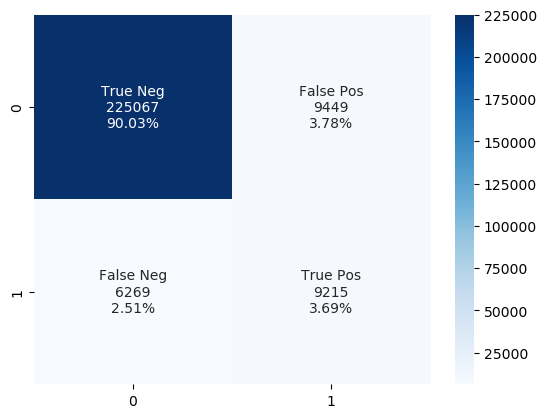

In [40]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [41]:
from sklearn.metrics import f1_score

f1_score(np.array(Y_test[0]), predictions, average='macro')

0.7529845851387855

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test[0],predictions)

0.937128